In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import math

In [2]:
# merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["../resources/1950-1964/stormevents_1950.csv", "../resources/1950-1964/stormevents_1951.csv", "../resources/1950-1964/stormevents_1952.csv", 
                      "../resources/1950-1964/stormevents_1953.csv", "../resources/1950-1964/stormevents_1954.csv", "../resources/1950-1964/stormevents_1955.csv",
                      "../resources/1950-1964/stormevents_1956.csv", "../resources/1950-1964/stormevents_1957.csv", "../resources/1950-1964/stormevents_1958.csv",
                      "../resources/1950-1964/stormevents_1959.csv", "../resources/1950-1964/stormevents_1960.csv", "../resources/1950-1964/stormevents_1961.csv",
                      "../resources/1950-1964/stormevents_1962.csv", "../resources/1950-1964/stormevents_1963.csv", "../resources/1950-1964/stormevents_1964.csv"]),
                      ignore_index=True)
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [3]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR", 
                                     "STATE", 
                                     "EVENT_TYPE",  
                                     "INJURIES_DIRECT", 
                                     "INJURIES_INDIRECT",
                                     "DEATHS_DIRECT", 
                                     "DEATHS_INDIRECT",
                                     "DAMAGE_PROPERTY",
                                     "DAMAGE_CROPS", 
                                     "SOURCE", 
                                     "MAGNITUDE", 
                                     "MAGNITUDE_TYPE", 
                                     "TOR_F_SCALE", 
                                     "TOR_LENGTH",
                                     "TOR_WIDTH",
                                     "TOR_OTHER_CZ_STATE",
                                     "BEGIN_LOCATION", 
                                     "BEGIN_LAT", 
                                     "BEGIN_LON", 
                                     "END_LAT", 
                                     "END_LON", 
                                     "EPISODE_ID", 
                                     "EVENT_ID",]]
clean_mergestorm_df

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,OKLAHOMA,Tornado,0,0,0,0,250K,0,NaN,...,3.4,400,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,10096222
1,1950,TEXAS,Tornado,0,0,0,0,25K,0,NaN,...,11.5,200,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,10120412
2,1950,PENNSYLVANIA,Tornado,2,0,0,0,25K,0,NaN,...,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
3,1950,PENNSYLVANIA,Tornado,0,0,0,0,2.5K,0,NaN,...,0.0,13,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,10104928
4,1950,PENNSYLVANIA,Tornado,0,0,0,0,2.5K,0,NaN,...,0.0,33,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,10104929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22082,1964,KANSAS,Hail,0,0,0,0,0,0,NaN,...,0.0,0,NaN,NaN,39.38,-99.28,NaN,NaN,NaN,10025243
22083,1964,KANSAS,Tornado,2,0,0,0,0K,0,NaN,...,25.7,880,NaN,NaN,37.95,-98.88,38.27,-98.63,NaN,10025244
22084,1964,KANSAS,Tornado,0,0,0,0,250K,0,NaN,...,34.0,880,NaN,NaN,38.27,-98.63,38.70,-98.33,NaN,10025245
22085,1964,KANSAS,Hail,0,0,0,0,0,0,NaN,...,0.0,0,NaN,NaN,37.88,-95.40,NaN,NaN,NaN,10025246


In [4]:
# Converting NaN values to string "0.00K"
clean_mergestorm_df["DAMAGE_PROPERTY"] = clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
clean_mergestorm_df["DAMAGE_CROPS"] = clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")

C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1663302178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["DAMAGE_PROPERTY"] = clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1663302178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["DAMAGE_CROPS"] = clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")


In [5]:
clean_mergestorm_df

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,OKLAHOMA,Tornado,0,0,0,0,250K,0,NaN,...,3.4,400,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,10096222
1,1950,TEXAS,Tornado,0,0,0,0,25K,0,NaN,...,11.5,200,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,10120412
2,1950,PENNSYLVANIA,Tornado,2,0,0,0,25K,0,NaN,...,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
3,1950,PENNSYLVANIA,Tornado,0,0,0,0,2.5K,0,NaN,...,0.0,13,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,10104928
4,1950,PENNSYLVANIA,Tornado,0,0,0,0,2.5K,0,NaN,...,0.0,33,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,10104929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22082,1964,KANSAS,Hail,0,0,0,0,0,0,NaN,...,0.0,0,NaN,NaN,39.38,-99.28,NaN,NaN,NaN,10025243
22083,1964,KANSAS,Tornado,2,0,0,0,0K,0,NaN,...,25.7,880,NaN,NaN,37.95,-98.88,38.27,-98.63,NaN,10025244
22084,1964,KANSAS,Tornado,0,0,0,0,250K,0,NaN,...,34.0,880,NaN,NaN,38.27,-98.63,38.70,-98.33,NaN,10025245
22085,1964,KANSAS,Hail,0,0,0,0,0,0,NaN,...,0.0,0,NaN,NaN,37.88,-95.40,NaN,NaN,NaN,10025246


In [6]:
# change a string into a float; account for magnitude of the number as represented in the string

def retype_damage_value(value):
    if pd.isna(value):
        return np.nan

    try:
        if isinstance(value, (int, float)):
            return float(value)

        value_str = str(value)
        if not value_str:
            return np.nan

        num_str = value[:-1]
        magnitude = value[-1]

        num = float(num_str)
        
        if magnitude == 'K':
            num *= 1000
        elif magnitude == 'M':
            num *= 1000000
        elif magnitude == 'B':
            num *= 1000000000
    
        return num
    except (ValueError, IndexError):
        return np.nan

In [7]:
# Applying function from previous cell

clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)
clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)

C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1853198611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)
C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1853198611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)


In [8]:
# Display DataFrame

clean_mergestorm_df.head(25)

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,OKLAHOMA,Tornado,0,0,0,0,250000.0,0.0,NaN,...,3.4,400,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,10096222
1,1950,TEXAS,Tornado,0,0,0,0,25000.0,0.0,NaN,...,11.5,200,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,10120412
2,1950,PENNSYLVANIA,Tornado,2,0,0,0,25000.0,0.0,NaN,...,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
3,1950,PENNSYLVANIA,Tornado,0,0,0,0,2500.0,0.0,NaN,...,0.0,13,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,10104928
4,1950,PENNSYLVANIA,Tornado,0,0,0,0,2500.0,0.0,NaN,...,0.0,33,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,10104929
5,1950,PENNSYLVANIA,Tornado,0,0,0,0,2500.0,0.0,NaN,...,1.0,33,NaN,NaN,40.22,-75.00,NaN,NaN,NaN,10104930
6,1950,PENNSYLVANIA,Tornado,1,0,0,0,250000.0,0.0,NaN,...,4.7,100,NaN,NaN,40.20,-76.12,40.27,-76.07,NaN,10104931
7,1950,PENNSYLVANIA,Tornado,0,0,0,0,250000.0,0.0,NaN,...,11.2,100,NaN,NaN,40.27,-76.07,40.40,-75.93,NaN,10104932
8,1950,OKLAHOMA,Tornado,6,0,0,0,250000.0,0.0,NaN,...,6.8,100,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490
9,1950,OKLAHOMA,Tornado,0,0,0,0,250.0,0.0,NaN,...,0.0,33,NaN,NaN,34.83,-95.85,NaN,NaN,NaN,10099491


In [9]:
# Add new columns that combine direct/indirect deaths; direct/indirect injuries; property/crop damage

clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df

C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1025980192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1025980192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
C:\Users\fu5i1\AppData\Local\Temp\ipykernel_9360\1

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,1950,OKLAHOMA,Tornado,0,0,0,0,250000.0,0.0,NaN,...,NaN,35.12,-99.20,35.17,-99.20,NaN,10096222,0,0,250000.0
1,1950,TEXAS,Tornado,0,0,0,0,25000.0,0.0,NaN,...,NaN,31.90,-98.60,31.73,-98.60,NaN,10120412,0,0,25000.0
2,1950,PENNSYLVANIA,Tornado,2,0,0,0,25000.0,0.0,NaN,...,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927,0,2,25000.0
3,1950,PENNSYLVANIA,Tornado,0,0,0,0,2500.0,0.0,NaN,...,NaN,40.60,-76.75,NaN,NaN,NaN,10104928,0,0,2500.0
4,1950,PENNSYLVANIA,Tornado,0,0,0,0,2500.0,0.0,NaN,...,NaN,41.63,-79.68,NaN,NaN,NaN,10104929,0,0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22082,1964,KANSAS,Hail,0,0,0,0,NaN,0.0,NaN,...,NaN,39.38,-99.28,NaN,NaN,NaN,10025243,0,0,NaN
22083,1964,KANSAS,Tornado,2,0,0,0,0.0,0.0,NaN,...,NaN,37.95,-98.88,38.27,-98.63,NaN,10025244,0,2,0.0
22084,1964,KANSAS,Tornado,0,0,0,0,250000.0,0.0,NaN,...,NaN,38.27,-98.63,38.70,-98.33,NaN,10025245,0,0,250000.0
22085,1964,KANSAS,Hail,0,0,0,0,NaN,0.0,NaN,...,NaN,37.88,-95.40,NaN,NaN,NaN,10025246,0,0,NaN


In [10]:
# dropping columns that were combined in previous cell

drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", 
                                                   "INJURIES_INDIRECT",
                                                   "DEATHS_DIRECT", 
                                                   "DEATHS_INDIRECT",
                                                   "DAMAGE_PROPERTY",
                                                   "DAMAGE_CROPS"])
drop_merged_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,1950,OKLAHOMA,Tornado,NaN,0.0,NaN,F3,3.4,400,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,10096222,0,0,250000.0
1,1950,TEXAS,Tornado,NaN,0.0,NaN,F1,11.5,200,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,10120412,0,0,25000.0
2,1950,PENNSYLVANIA,Tornado,NaN,0.0,NaN,F2,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927,0,2,25000.0
3,1950,PENNSYLVANIA,Tornado,NaN,0.0,NaN,F2,0.0,13,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,10104928,0,0,2500.0
4,1950,PENNSYLVANIA,Tornado,NaN,0.0,NaN,F0,0.0,33,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,10104929,0,0,2500.0


In [11]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 1) | (drop_merged_df["TOTAL INJURIES"] > 1)]

# reset the index 
narrow_df.reset_index(drop=True, inplace=True)

# Display sample data
narrow_df.head(25)

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,1950,PENNSYLVANIA,Tornado,NaN,0.0,NaN,F2,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927,0,2,25000.0
1,1950,OKLAHOMA,Tornado,NaN,0.0,NaN,F2,6.8,100,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490,0,6,250000.0
2,1950,OKLAHOMA,Tornado,NaN,0.0,NaN,F4,4.5,200,NaN,NaN,35.08,-96.40,35.13,-96.35,NaN,10096223,5,32,250000.0
3,1950,OKLAHOMA,Tornado,NaN,0.0,NaN,F2,4.3,33,NaN,NaN,36.12,-97.83,36.17,-97.78,NaN,10096230,0,3,25000.0
4,1950,MISSISSIPPI,Tornado,NaN,0.0,NaN,F1,0.1,10,NaN,NaN,34.73,-88.27,NaN,NaN,NaN,10049534,0,2,25000.0
5,1950,TEXAS,Tornado,NaN,0.0,NaN,F2,4.7,133,NaN,NaN,26.88,-98.12,26.88,-98.05,NaN,10120401,0,2,0.0
6,1950,TEXAS,Tornado,NaN,0.0,NaN,F3,12.0,1000,NaN,NaN,29.67,-95.05,29.83,-95.00,NaN,10120403,1,12,25000.0
7,1950,TEXAS,Tornado,NaN,0.0,NaN,F2,4.6,100,NaN,NaN,32.35,-95.20,32.42,-95.20,NaN,10120404,0,5,250000.0
8,1950,TEXAS,Tornado,NaN,0.0,NaN,F2,4.5,67,NaN,NaN,32.98,-94.63,33.00,-94.70,NaN,10120405,0,6,250000.0
9,1950,TEXAS,Tornado,NaN,0.0,NaN,F2,8.0,833,NaN,NaN,33.33,-94.42,33.45,-94.42,NaN,10120406,1,8,25000.0


In [12]:
# Reordering columns
reordernarrow_df = narrow_df[["YEAR", 
                              "STATE", 
                              "EVENT_TYPE", 
                              "TOTAL DEATHS", 
                              "TOTAL INJURIES", 
                              "TOTAL DAMAGES", 
                              "SOURCE", 
                              "MAGNITUDE", 
                              "MAGNITUDE_TYPE", 
                              "TOR_F_SCALE", 
                              "TOR_LENGTH", 
                              "TOR_WIDTH", 
                              "TOR_OTHER_CZ_STATE", 
                              "BEGIN_LOCATION", 
                              "BEGIN_LAT", 
                              "BEGIN_LON", 
                              "END_LAT", 
                              "END_LON", 
                              "EPISODE_ID", 
                              "EVENT_ID",]]
reordernarrow_df

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,1950,PENNSYLVANIA,Tornado,0,2,25000.0,NaN,0.0,NaN,F2,12.9,33,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927
1,1950,OKLAHOMA,Tornado,0,6,250000.0,NaN,0.0,NaN,F2,6.8,100,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490
2,1950,OKLAHOMA,Tornado,5,32,250000.0,NaN,0.0,NaN,F4,4.5,200,NaN,NaN,35.08,-96.40,35.13,-96.35,NaN,10096223
3,1950,OKLAHOMA,Tornado,0,3,25000.0,NaN,0.0,NaN,F2,4.3,33,NaN,NaN,36.12,-97.83,36.17,-97.78,NaN,10096230
4,1950,MISSISSIPPI,Tornado,0,2,25000.0,NaN,0.0,NaN,F1,0.1,10,NaN,NaN,34.73,-88.27,NaN,NaN,NaN,10049534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1964,FLORIDA,Tornado,0,3,2500.0,NaN,0.0,NaN,F1,0.0,33,NaN,NaN,26.35,-80.08,NaN,NaN,NaN,9988787
1135,1964,SOUTH DAKOTA,Tornado,0,10,2500000.0,NaN,0.0,NaN,F1,11.1,33,NaN,NaN,44.82,-98.93,44.97,-98.83,NaN,10113691
1136,1964,TENNESSEE,Tornado,0,3,25000.0,NaN,0.0,NaN,F2,7.6,200,NaN,NaN,35.30,-89.70,35.40,-89.65,NaN,10127476
1137,1964,KANSAS,Tornado,0,2,2500.0,NaN,0.0,NaN,F1,0.0,33,NaN,NaN,38.42,-97.05,NaN,NaN,NaN,10025250


In [13]:
# Export the narrowed data into a csv
reordernarrow_df.to_csv("reorder_narrow_df_1950-1964.csv")

In [14]:
# creating new DataFrame to show year and total deaths
year_deaths_df = reordernarrow_df[['YEAR', 'TOTAL DEATHS']]
year_deaths_df

,YEAR,TOTAL DEATHS
0,1950,0
1,1950,0
2,1950,5
3,1950,0
4,1950,0
...,...,...
1134,1964,0
1135,1964,0
1136,1964,0
1137,1964,0


In [15]:
# Using groupby that finds the sum of total deaths per year
combined_year_deaths_df = year_deaths_df.groupby('YEAR')['TOTAL DEATHS'].sum().reset_index()
combined_year_deaths_df

,YEAR,TOTAL DEATHS
0,1950,67
1,1951,29
2,1952,231
3,1953,517
4,1954,33
5,1955,124
6,1956,82
7,1957,187
8,1958,62
9,1959,54


In [16]:
# Determine if there are any potential outliers in total deaths between 1950 and 1964
quartiles = combined_year_deaths_df['TOTAL DEATHS'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of total deaths is: {lowerq}")
print(f"The upper quartile of total deaths is: {upperq}")
print(f"The interquartile range of total deaths is: {iqr}")
print(f"The the median of total deaths is: {quartiles[0.5]} ")
print(f"The mean of total deaths is: {np.mean(combined_year_deaths_df['TOTAL DEATHS'])}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_total_deaths = combined_year_deaths_df.loc[(combined_year_deaths_df['TOTAL DEATHS'] < lower_bound) | (combined_year_deaths_df['TOTAL DEATHS'] > upper_bound)]
outlier_total_deaths

The lower quartile of total deaths is: 38.0
The upper quartile of total deaths is: 103.0
The interquartile range of total deaths is: 65.0
The the median of total deaths is: 62.0 
The mean of total deaths is: 107.0
Values below -59.5 could be outliers.
Values above 200.5 could be outliers.


,YEAR,TOTAL DEATHS
2,1952,231
3,1953,517


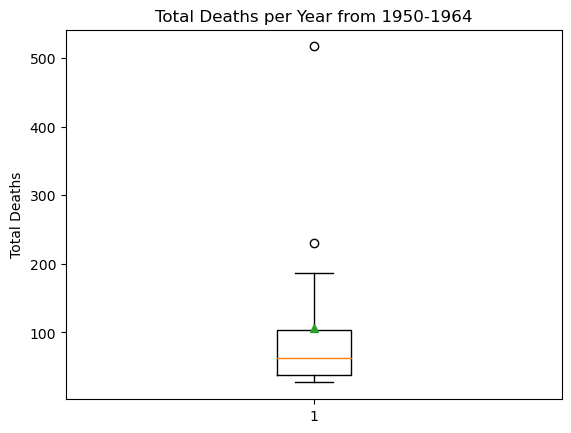

In [17]:
# Plotting the box and whisker plot
fig1, ax1 = plt.subplots()
ax1.set_title('Total Deaths per Year from 1950-1964')
ax1.set_ylabel('Total Deaths')
ax1.boxplot(combined_year_deaths_df['TOTAL DEATHS'], showmeans=True)
plt.savefig('box_whisker_1950-1964.png')
plt.show()